<a href="https://colab.research.google.com/github/onurerdogan2001/ie423tasks/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

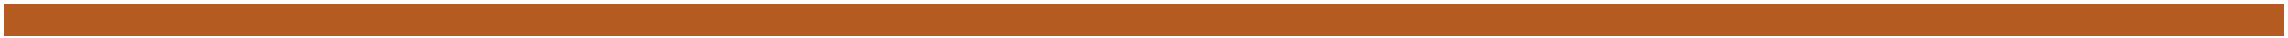

## <font color='#475468'> IE423 TASK3:</font>
### <font color='#475468'> Black Friday Sales</font>
### <font color='#475468'> Onur Erdoğan 21903313</font>

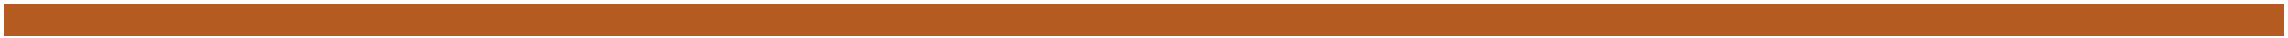

## Initialize

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfSales = pd.read_csv('/content/drive/MyDrive/yazokulu/sales.csv')

dfSales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
dfSales.duplicated().value_counts()

False    550068
Name: count, dtype: int64

In [6]:
dfSales.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

There are missing values.

Starting, I will try to manipulate the data to make it usefull for my model.

Firstly, I want to encode NaN values, if I can. NaN values are in columns: 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years. Product ID cannot be labeled. Starting with 'Gender'.

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfSales['Gender'] = label_encoder.fit_transform(dfSales['Gender'])

print(dfSales.Gender.unique())

[0 1]


Now 'Gender" will be represented by 1 and 0.

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfSales['Age'] = label_encoder.fit_transform(dfSales['Age'])
print(dfSales.Age.unique())

[0 6 2 4 5 3 1]


To be honest I am not sure why the codes for 'Age' are like that. But it is usefull enough.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfSales['City_Category'] = label_encoder.fit_transform(dfSales['City_Category'])
print(dfSales.City_Category.unique())

[0 2 1]


City_Category is done.

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfSales['Stay_In_Current_City_Years'] = label_encoder.fit_transform(dfSales['Stay_In_Current_City_Years'])
print(dfSales.Stay_In_Current_City_Years.unique())

[2 4 3 1 0]


Stay_In_Current_City_Years is done.

Since Product Id column is cannot be encoded, and encoding it might be silly, I do not want to try to encode that. I simply remove it from the model, since it is not giving any useful information.

In [11]:
dfSales = dfSales.drop(columns=['Product_ID'])
dfSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 46.2 MB


Now we need to deal with missing data  in the dataset as we found out it earlier. Product_Category_2 and Product_Category_3 has NaN's as we can remember.

In [12]:
dfSales.isna().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
# Select target as a series and features as dataframe
y = dfSales.loc[:,['Purchase']].values.ravel()
X = dfSales.drop(['Purchase'],axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

# RANDOM FOREST MODEL

> Blok alıntı ekle



In [14]:
from sklearn.ensemble import RandomForestRegressor

# Function for building and scoring Random Forest models
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfsMlb = RandomForestRegressor(random_state=1)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return (mae)

In [15]:
dfSales['Purchase'].mean()

9263.968712959126

## Approach 1 - Drop columns with missing values

In [16]:
# Identify columns with missing values and then drop such columns
cols_num_null = [col for col in X_train.columns
    if X_train[col].isnull().any()]
X_train_drpnull = X_train.drop(cols_num_null, axis=1)
X_test_drpnull = X_test.drop(cols_num_null, axis=1)

In [17]:
print('MAE from Approach 1 (Drop features with missing values):')
print(get_random_forest_mae(X_train_drpnull, X_test_drpnull, y_train, y_test))

MAE from Approach 1 (Drop features with missing values):
2086.9821853547915


Meain is 9263 and MAE is 2086. =>22%

## Approach 2. Fill missing values by Imputation


In [20]:
# Impute missing values in y_train and y_test (replace NaN with the mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = imputer.fit_transform(y_test.reshape(-1, 1)).ravel()

# Replace with specific value (0, bfill, ffill)
Xnum_train_repnull = X_train.fillna(method = 'ffill')
Xnum_test_repnull = X_test.fillna(method = 'ffill')

# Add this line to fill any remaining NaNs with 0
Xnum_train_repnull = Xnum_train_repnull.fillna(0)
Xnum_test_repnull = Xnum_test_repnull.fillna(0)

print('MAE from Approach 2 (Replace missing values with forward fill):')
print(get_random_forest_mae(Xnum_train_repnull, Xnum_test_repnull, y_train, y_test)) # Pass the imputed y_train and y_test

MAE from Approach 2 (Replace missing values with forward fill):
2218.8003691716895


Its no better than 2086..

In [22]:
# Replace with mean value
Xnum_train_repnull = X_train.fillna(X_train.mean())
Xnum_test_repnull = X_test.fillna(X_test.mean())

print('MAE from Approach 2 (Replace missing values with mean):')
print(get_random_forest_mae(Xnum_train_repnull, Xnum_test_repnull, y_train, y_test))

MAE from Approach 2 (Replace missing values with mean):
2154.1957010239944


Still no better than 2086 but its better than be filling with 0s. I think even dropping columns looks better, its not. Because we dropped so many columns that the data remain is different than the actual data, so comparing is not that meaningful.

# Gradient Boosting Model

In [26]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
mdlXgbMlb = XGBRegressor()
mdlXgbMlb.fit(X_train, y_train)
y_test_pred = mdlXgbMlb.predict(X_test)
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
2088.6112097944483


Its nearly the same result with 'filling with 0s' which was the best. We are not dropping columns here, so I can say this is the best model so far.

### Tuning

n_estimators=5000 was taking so long time so I decreased it.

In [30]:
#Build and score a tuned Gradient Boosting Model
mdlXgbMlb = XGBRegressor(n_estimators=2500, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(X_train, y_train)
y_test_pred = mdlXgbMlb.predict(X_test)
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
2138.3882931649578


Its worse so I tune it back to 5000.

In [31]:
#Build and score a tuned Gradient Boosting Model
mdlXgbMlb = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(X_train, y_train)
y_test_pred = mdlXgbMlb.predict(X_test)
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
2099.574402201782


Its the same so maybe I need to learn tuning this model better.

# Takeaways
Tasks are not that easy anymore.